<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-1.-Описание-данных." data-toc-modified-id="Шаг-1.-Описание-данных.-1">Шаг 1. Описание данных.</a></span></li><li><span><a href="#Шаг-2.-Предобработка-данных." data-toc-modified-id="Шаг-2.-Предобработка-данных.-2">Шаг 2. Предобработка данных.</a></span><ul class="toc-item"><li><span><a href="#Шаг-2.1.-Удаление-выбросов." data-toc-modified-id="Шаг-2.1.-Удаление-выбросов.-2.1">Шаг 2.1. Удаление выбросов.</a></span></li><li><span><a href="#Шаг-2.2.-Оценка-взаимосвязи-между-параметрами." data-toc-modified-id="Шаг-2.2.-Оценка-взаимосвязи-между-параметрами.-2.2">Шаг 2.2. Оценка взаимосвязи между параметрами.</a></span></li></ul></li><li><span><a href="#Шаг-3.-Подбор-моделей-с-наилучшими-значениями-Accuracy." data-toc-modified-id="Шаг-3.-Подбор-моделей-с-наилучшими-значениями-Accuracy.-3">Шаг 3. Подбор моделей с наилучшими значениями Accuracy.</a></span><ul class="toc-item"><li><span><a href="#Шаг-3.1.-Разделение-исходных-данных-на-выборки." data-toc-modified-id="Шаг-3.1.-Разделение-исходных-данных-на-выборки.-3.1">Шаг 3.1. Разделение исходных данных на выборки.</a></span></li><li><span><a href="#Шаг-3.2.-Подбор-оптимальных-гиперпараметров-для-каждой-модели." data-toc-modified-id="Шаг-3.2.-Подбор-оптимальных-гиперпараметров-для-каждой-модели.-3.2">Шаг 3.2. Подбор оптимальных гиперпараметров для каждой модели.</a></span></li></ul></li><li><span><a href="#Шаг-4.-Проверка-работы-моделей-на-тестовой-выборке." data-toc-modified-id="Шаг-4.-Проверка-работы-моделей-на-тестовой-выборке.-4">Шаг 4. Проверка работы моделей на тестовой выборке.</a></span></li><li><span><a href="#Шаг-5.-Рассчет-Precision-и-Recall." data-toc-modified-id="Шаг-5.-Рассчет-Precision-и-Recall.-5">Шаг 5. Рассчет Precision и Recall.</a></span></li><li><span><a href="#Шаг-6.-Итоги-исследования." data-toc-modified-id="Шаг-6.-Итоги-исследования.-6">Шаг 6. Итоги исследования.</a></span><ul class="toc-item"><li><span><a href="#Шаг-6.1.-Описание-хода-исследования." data-toc-modified-id="Шаг-6.1.-Описание-хода-исследования.-6.1">Шаг 6.1. Описание хода исследования.</a></span></li><li><span><a href="#Шаг-6.2.-Общий-вывод." data-toc-modified-id="Шаг-6.2.-Общий-вывод.-6.2">Шаг 6.2. Общий вывод.</a></span></li></ul></li></ul></div>

# Рекомендация новых тарифов оператора связи "Мегалайн"

**Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра». В нашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы. Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных уже выполнена. Необходимо построить модель с максимально большим значением accuracy.** 

## Шаг 1. Описание данных.

In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from joblib import dump
from sklearn.linear_model import LogisticRegression
from distutils.version import LooseVersion
from packaging import version
from sklearn.dummy import DummyClassifier

In [2]:
# импорт библиотеки для предупреждений
import warnings
warnings.filterwarnings('ignore')

In [3]:
# чтение датасета, запись его в переменную используя метод try-except и вывод таблицы на экран
try:
    df = pd.read_csv('/Users/regki/Downloads/users_behavior.csv')
except:
    df =pd.read_csv('/datasets/users_behavior.csv')
df

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [4]:
# обзор данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
# вывод уникальных значений столбца "is_ultra"
df['is_ultra'].unique()

array([0, 1], dtype=int64)

В датасете 3214 строк с данными, без пропусков. Четыре столбца с данными в вещественном формате, один в целочисленном. Данные из первых четырех столбцов определим как признаки, по которым, выбранные нами модели будут предсказывать целевой признак, данные которого записаны в столбец "is_ultra". Целевой признак - категориальный и имеет 2 значения, то есть будем использовать модели, решающие задачи классификации. Для того, чтобы обучение модели проходило корректно, выясним, есть ли в данных выбросы, при их наличии удалим. Для этого построим диаграмму "Ящик с усами" по всем признакам: количеству звонков, длительности звонков, количеству сообщений, объему интернет-траффика.

## Шаг 2. Предобработка данных.

### Шаг 2.1. Удаление выбросов.

Создадим функцию для постройки "боксплотов" по всем признакам модели обучения. Она принимает в качестве аргументов списки с наименованием признаков, заголовков и наименования оси Y. Внутри функции в цикле перебираются индексы элементов списков и с помощью библиотеки "seaborn" и в результате идет построение "боксплотов".

In [6]:
# создание функции для постройки "боксплотов"
def tariff_boxplot(indicators, title_box, title_y):
    for i in range(len(indicators)):
        sns.set_style('whitegrid')
        sns.axes_style('white')
        plt.figure(figsize=(6,4))
        sns.boxplot(data = df, x='is_ultra', y=indicators[i])
        plt.title(title_box[i], fontsize=14)
        plt.xlabel('Тариф', fontsize=12)
        plt.ylabel(title_y[i], fontsize=12)
        plt.xticks(fontsize=12)

In [7]:
# создание списков с наименованиями признаков, заголовков "боксплотов" и наименований оси Y графиков
list_indicators = ['calls', 'minutes', 'messages', 'mb_used']
list_title_box = ['Разброс данных количества звонков по тарифам', 'Разброс данных длительности звонков по тарифам', 
                  'Разброс данных количества смс по тарифам', 'Разброс данных объема интернет-траффика по тарифам']
list_title_y = ['Количество звонков, шт.', 'Длительность разговоров, мин.', 'Количество смс, шт.', 
                  'Объем интернет-траффика, мб.']

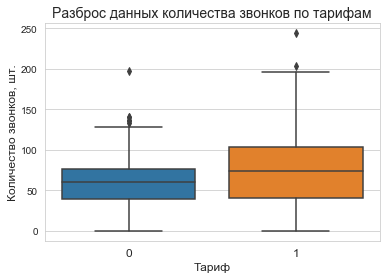

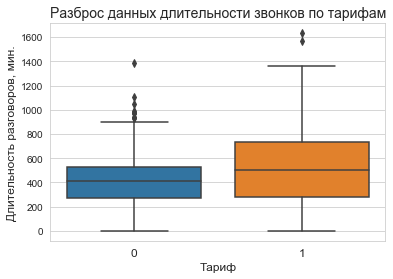

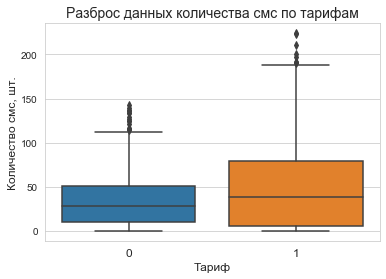

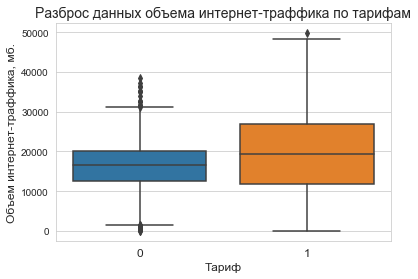

In [8]:
# вызов функции по отрисовке "боксплотов"
tariff_boxplot(list_indicators, list_title_box, list_title_y)

Из графиков видно, что имеются выбросы в данных. Так как их наличие искажает данные и можетпривести к некорректной работе модели, то строки с ними последовательно удалим. 

In [9]:
# последовательное удаление строк по всем признакам по каждому из тарифов, с применением переиндексации
df = df.drop(df.loc[((df['is_ultra'] == 0) & (df['calls'] > 135)) | ((df['is_ultra'] == 1)
                                                                     & (df['calls'] > 200))].index).reset_index(drop=True)
df = df.drop(df.loc[((df['is_ultra'] == 0) & (df['minutes'] > 900))  | ((df['is_ultra'] == 1)
                                                                     & (df['minutes'] > 1400))].index).reset_index(drop=True)
df = df.drop(df.loc[((df['is_ultra'] == 0) & (df['messages'] > 120)) | ((df['is_ultra'] == 1)
                                                                     & (df['messages'] > 180))].index).reset_index(drop=True)
df = df.drop(df.loc[((df['is_ultra'] == 0) & ((df['mb_used'] < 1500) | (df['mb_used'] > 32000))) | ((df['is_ultra'] == 1)
                                                                     & (df['mb_used'] > 48000))].index).reset_index(drop=True)

In [10]:
# обзор данных после удаления выбросов
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 5 columns):
calls       3142 non-null float64
minutes     3142 non-null float64
messages    3142 non-null float64
mb_used     3142 non-null float64
is_ultra    3142 non-null int64
dtypes: float64(4), int64(1)
memory usage: 122.9 KB


Посчитаем долю удаленных данных и убедимся, что она не превышает 10 % от общего количества строк.

In [11]:
# рассчет доли удаленных данных от выбросов
print('Доля удаленных данных от выбросов: {:.2%}'.format((3214-3142)/3214))

Доля удаленных данных от выбросов: 2.24%


Доля удаленных данных менее 3 %. Далее посмотрим насколько сбалансированы данные по классам.

In [12]:
# рассчет доли каждого из классов в общем объеме данных
print('Доля абонентов на тарифе "ultra":{:.2%}'.format(((df[df['is_ultra'] == 1]['is_ultra'].count())/len(df))))
print('Доля абонентов на тарифе "smart":{:.2%}'.format(((df[df['is_ultra'] == 0]['is_ultra'].count())/len(df))))

Доля абонентов на тарифе "ultra":30.81%
Доля абонентов на тарифе "smart":69.19%


Из рассчетов видно, что данные по классам распределены неравномерно, поэтому помимо метрики Accuracy нужно будет еще использовать инструменты для измерения эффективности предсказания модели, учитывающие эффективность прогноза по каждому тарифу.

### Шаг 2.2. Оценка взаимосвязи между параметрами.

Посчитаем корреляцию между параметрами, влияющими на целевой признак и построим матрицу диаграмм рассеяния по каждому из тарифов.

In [13]:
# матрица корреляции между параметрами 
df.corr()

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.981216,0.180122,0.272282,0.214472
minutes,0.981216,1.000000,0.176589,0.267540,0.214555
messages,0.180122,0.176589,1.000000,0.162633,0.190859
mb_used,0.272282,0.267540,0.162633,1.000000,0.193430
is_ultra,0.214472,0.214555,0.190859,0.193430,1.000000


Ощутимой связь можно считать, если коэффициент корреляции Пирсона более 0.7. Из таблицы корреляции видно, что сильная взаимосвязь наблюдается между длительностью разговоров и количеством звонков, что вполне очевидно - чем больше звонков, тем тем больше минут разговоров за месяц. Построим матрицу диаграмм рассеяния по каждому тарифу, возможно есть различия во взаимосвязях,  учитывая целевой признак.

Text(0.5, 0.98, 'Корреляция параметров и целевого признака')

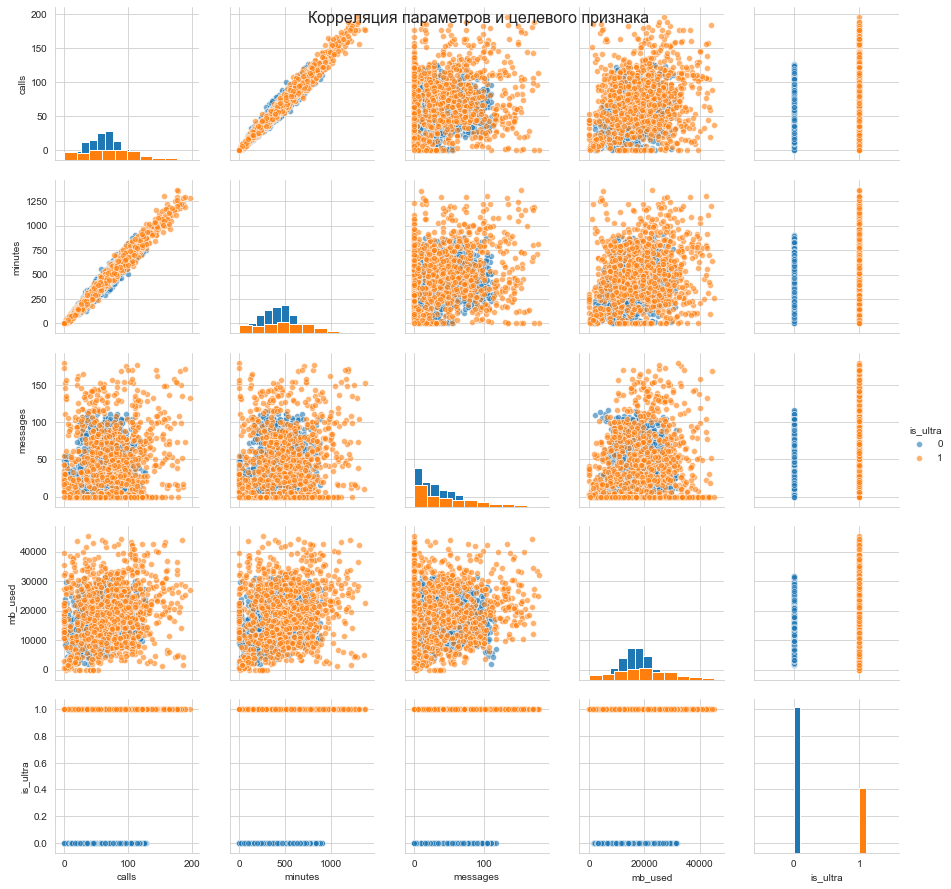

In [14]:
# построение матрицы диаграмм рассеяния между параметрами, влияющими на целевой признак
p_pl = sns.pairplot(df, hue='is_ultra',  diag_kind = 'hist', kind = 'scatter', 
                    plot_kws={'alpha':0.6})
p_pl.fig.suptitle('Корреляция параметров и целевого признака', fontsize=16)

Из графиков также видно, что существует сильная взаимосвязь между длительностью разговоров и количеством звонков в месяц. Несмотря на очень слабую корреляцию между остальными параметрами, можно заметить, что данные по взаимосвязям между параметрами по тарифу "smart" распределены существенно компактнее, чем по тарифу "ultra". Возможно, это объясняется меньшими ограничениями по всем услугам на тарифе "ultra", что скорее всего может повлиять на обучение модели для определения тарифа.  

## Шаг 3. Подбор моделей с наилучшими значениями Accuracy.

### Шаг 3.1. Разделение исходных данных на выборки.

Разделим исходные данные на тренировочные признаки и целевой признак, а также на тренировочную, тестовую и валидационную выборки. Размер тестовой и валидационной выборки определим по 20 % от исходных данных.

In [15]:
# разделение данных на признаки и целевой признак
features = df.drop('is_ultra', axis=1) 
target = df['is_ultra']

In [16]:
# разделение данных на тренировочную и тестовую выборки
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.4, random_state=12345)

In [17]:
# разделение данных на тренировочную и валидационную выбор
features_test, features_valid, target_test, target_valid = train_test_split(
    features_test, target_test, test_size=0.5, random_state=12345)

### Шаг 3.2. Подбор оптимальных гиперпараметров для каждой модели.

Так как выполняем задачу классификации, то возьмем три основные модели, подходящие для этого: "Решающее дерево", "Случайный лес", "Логистическая регрессия". Обучим их на исходных данных. Для этого, используя цикл и условный оператор подберем гиперпараметры, с которыми каждая модель достигнет наибольшего значения Accuracy. Выведем наилучшее Accuracy для каждой модели, а также значения основных гиперпараметров на экран. 

In [18]:
# подбор оптимальных гиперпараметров для модели "Решающее дерево", обучение модели, предсказание моделью, вывод наилучшего 
# Accuracy и оптимальных гиперпараметров на экран
best_model = None
best_model = None
best_depth = 0
best_result = 0
for depth in range(1, 5):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    model.fit(features_train, target_train) 
    predictions = model.predict(features_valid) 
    result = accuracy_score(target_valid, predictions) 
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth

        
print('Accuracy модели "Решающее делево" с наилучшими гиперпараметрами на валидационной выборке:', best_result,', ' 
      'лучшая глубина дерева:', best_depth)

Accuracy модели "Решающее делево" с наилучшими гиперпараметрами на валидационной выборке: 0.7996820349761526 , лучшая глубина дерева: 4


In [19]:
# подбор оптимальных гиперпараметров для модели "Случайный лес", обучение модели, предсказание моделью, вывод наилучшего 
# Accuracy и оптимальных гиперпараметров на экран
best_model = None
best_est = 0
best_result = 0
for est in range(1, 11):
    model = RandomForestClassifier(random_state=12345, n_estimators=est) 
    model.fit(features_train, target_train) 
    predictions = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions) 
    if result > best_result:
        best_model = model 
        best_result = result
        best_est = est
        
print('Accuracy модели "Случайный лес" с наилучшими гиперпараметрами на валидационной выборке:', best_result,', ' 
      'лучшее количество деревьев:', best_est)

Accuracy модели "Случайный лес" с наилучшими гиперпараметрами на валидационной выборке: 0.7933227344992051 , лучшее количество деревьев: 10


In [20]:
# подбор оптимальных гиперпараметров для модели "Случайный лес", обучение модели, предсказание моделью, вывод наилучшего 
# Accuracy и оптимальных гиперпараметров на экран
# создание списка с наименованием алгоритмов для "Логистической регрессии"
solv = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
best_model = None
best_iter = 0
best_result = 0
best_solver = None
for it in range(100, 1001, 100):
    for sol in solv:
        model = LogisticRegression(random_state=12345, solver=sol, max_iter=it) 
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid) 
        result = accuracy_score(target_valid, predictions) 
        if result > best_result:    
            best_model = model
            best_result = result
            best_solver = sol
            best_iter = it
print('Accuracy модели "Логистическая регрессия" с наилучшими гиперпараметрами на валидационной выборке:', best_result, ', '
      'лучшее число итераций:', best_iter,', ' 'лучший алгоритм:', best_solver)

Accuracy модели "Логистическая регрессия" с наилучшими гиперпараметрами на валидационной выборке: 0.7408585055643879 , лучшее число итераций: 100 , лучший алгоритм: newton-cg


Обучив все три модели, подбирая оптимальные гиперпараметры, выяснили, что наилучшие Accuracy на валидационной выборке выдают "Случайный лес" и "Дерево решений", менее эффективным в решении этой задачи показала себя "Логистическая регрессия". Не забудем, что у нас лишь небольшая выборка из данных оператора связи и помимо качества предсказания модели также очень важный показатель скорости работы модели, "Случайный лес" при большом количестве деревьев работает медленнее всех, а "Логистическая регрессия" быстрее. Далее проверим работу наших моделей с лучшими гиперпараметрами на тестовой выборке. 

## Шаг 4. Проверка работы моделей на тестовой выборке.

Проверим оптимально настроенные модели на тестовой выборке. Для этого напишем функцию, которая аргументами принимает наименование моделей, а внутри нее проверяется работа модели на тестовой выборке и выводится на экран значение Accuracy. 

In [21]:
# создание функции для проверки работы моделей на тестовой выборке
def chek_test(name_model, title_model):
    model = name_model
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    result = accuracy_score(target_test, predictions)
    print(f'Accuracy лучшей модели "{title_model}" на тестовой выборке:', result)

In [22]:
# вызов функции для тестирования модели "Дерево решений"
chek_test(DecisionTreeClassifier(random_state=12345, max_depth=4), "Дерево решений" )

Accuracy лучшей модели "Дерево решений" на тестовой выборке: 0.7945859872611465


In [23]:
# вызов функции для тестирования модели "Случайный лес"
chek_test(RandomForestClassifier(random_state=12345, n_estimators=10), "Случайный лес" )

Accuracy лучшей модели "Случайный лес" на тестовой выборке: 0.7834394904458599


In [24]:
# вызов функции для тестирования модели "Логистическая регрессия"
chek_test(LogisticRegression(random_state=12345, solver='newton-cg', max_iter=100) , "Логистическая регрессия" )

Accuracy лучшей модели "Логистическая регрессия" на тестовой выборке: 0.7356687898089171


Как видно из проверки работы моделей на тестовой выборке, как и на валидационной модели "Случайный лес" и "Дерево решений" показали примерно одинаковый результат, немного больше Accuracy у "Дерева решений" - качество около 79 %. "Логистическая регрессия" выдала, как и на валидационной выборке Accuracy около 0.74. Но необходимо учесть, что выборка данных не совсем сбалансирвана, так как на тариф "ultra" приходится всего 30 % абонентов, а на "smart" около 70 %. Далее рассчитаем другие метрики для разных моделей. 

## Шаг 5. Рассчет Precision и Recall.

Более объективными метриками являются Precision и Recall. Precision("точность") показывает долю правильно идентифицированных объектов в одном из классов по отношению к общему числу объектов, идентифицированных моделью как объект этого класса. Еще одной метрикой является Recall ("полнота"), которая показывает долю идентифицированных объектов как определенный класс в реальном общем числе объектов этого класса. То есть Precision показывает реальную способность модели отличать класс от других классов, а Recall способность выявлять этот класс вообщем.
Напишем функцию, которая аргументами принимает наименование моделей, а внутри нее рассчитываются метрики Precision и Recall для трех отобранных моделей и выводит их на экран.

In [25]:
# создание функции, которая принимает наименование модели и рассчетывает для нее Precision и Recall
def check_precis_recal(name_model, title_model):
    model = name_model 
    model.fit(features_train, target_train) 
    predictions = model.predict(features_test) 
    precision = sklearn.metrics.precision_score(target_test, predictions, pos_label=0)
    print(f'Precision модели с оптимальными гиперпараметрами "{title_model}" на тестовой выборке по тарифу "смарт":', precision)
    precision = sklearn.metrics.precision_score(target_test, predictions, pos_label=1)
    print(f'Precision модели с оптимальными гиперпараметрами "{title_model}" на тестовой выборке по тарифу "ультра":', precision)
    print('\n')
    recall = sklearn.metrics.recall_score(target_test, predictions, pos_label=0)
    print(f'Recall модели с оптимальными гиперпараметрами "{title_model}" на тестовой выборке по тарифу "смарт":', recall)
    recall = sklearn.metrics.recall_score(target_test, predictions, pos_label=1)
    print(f'Recall модели с оптимальными гиперпараметрами "{title_model}" на тестовой выборке по тарифу "ультра":', recall)
        

In [26]:
# вызов функции для рассчета Precision и Recall по тарифам для модели "Дерево решений"
check_precis_recal(DecisionTreeClassifier(random_state=12345, max_depth=4), "Дерево решений")

Precision модели с оптимальными гиперпараметрами "Дерево решений" на тестовой выборке по тарифу "смарт": 0.7850287907869482
Precision модели с оптимальными гиперпараметрами "Дерево решений" на тестовой выборке по тарифу "ультра": 0.8411214953271028


Recall модели с оптимальными гиперпараметрами "Дерево решений" на тестовой выборке по тарифу "смарт": 0.960093896713615
Recall модели с оптимальными гиперпараметрами "Дерево решений" на тестовой выборке по тарифу "ультра": 0.44554455445544555


In [27]:
# вызов функции для рассчета Precision и Recall по тарифам для модели "Случайный лес"
check_precis_recal(RandomForestClassifier(random_state=12345, n_estimators=10), "Случайный лес")

Precision модели с оптимальными гиперпараметрами "Случайный лес" на тестовой выборке по тарифу "смарт": 0.7983539094650206
Precision модели с оптимальными гиперпараметрами "Случайный лес" на тестовой выборке по тарифу "ультра": 0.7323943661971831


Recall модели с оптимальными гиперпараметрами "Случайный лес" на тестовой выборке по тарифу "смарт": 0.9107981220657277
Recall модели с оптимальными гиперпараметрами "Случайный лес" на тестовой выборке по тарифу "ультра": 0.5148514851485149


In [28]:
# вызов функции для рассчета Precision и Recall по тарифом для модели "Логистическая регрессия"
check_precis_recal(LogisticRegression(random_state=12345, solver='newton-cg', max_iter=100) , "Логистическая регрессия")

Precision модели с оптимальными гиперпараметрами "Логистическая регрессия" на тестовой выборке по тарифу "смарт": 0.7280701754385965
Precision модели с оптимальными гиперпараметрами "Логистическая регрессия" на тестовой выборке по тарифу "ультра": 0.8103448275862069


Recall модели с оптимальными гиперпараметрами "Логистическая регрессия" на тестовой выборке по тарифу "смарт": 0.9741784037558685
Recall модели с оптимальными гиперпараметрами "Логистическая регрессия" на тестовой выборке по тарифу "ультра": 0.23267326732673269


 - Из рассчетов делаем вывод, что точность определения класса моделью "Дерево решений" несколько отличается для двух тарифов и составляет соответственно 78,5 % и 84 %, различия еще лучше видны в способности модели находить объекты относящиеся к каждому тарифу, модель нашла около 96 % объектов, относящихся к тарифу "smart", и доля  найденных объектов тарифа "ultra" более чем в 2 раза меньше 44 % от общего их числа.
 - Точность определения тарифа "smart" моделью "Случайный лес"  примерно такая же как у "Дерева решений", а тарифа "ultra" уступает более чем на 10 %. Причем метрика Recall с одинаковой разницей около 5 % выше при определении "ultra" и ниже при предсказании "smart".
 - Еще менее надежно показала себя модель "Логистическая регрессия", точность по обоим тарифам отличается на 8 % и составляет 72,8% и 81 % соответственно. а доля определенных объектов тарифа "smart" - 97,4 % от общего их числа, что в свою очередь больше почти в 5 раз, чем доля определенных объектов тарифа "ultra", составляющей только лишь 23,3 %. 
 
**Как и метрика Accuracy, Precision и Recall примерно одинаковы у моделей "Дерево решений" и "Случайный лес", точность определения тарифа "ultra" у первой модели немного выше, а вот полнота определения объектов этого тарифа уступает "Случайному лесу". У "Логистической регрессии" точность предсказания объектов "smart" несколько уступает предыдущим моделям, но по второму тарифу находится посередине. А вот Recall по тарифу "ultra" примерно в 2 раза ниже, чем у предыдущих моделей.**  

## Шаг 6. Итоги исследования.

### Шаг 6.1. Описание хода исследования.

Для реализации поставленной задачи мы:
   - Посмотрели датасет, определили признаки и целевой признак для обучения моделей.
   - Очистили данные от выбросов, построив диаграммы "ящик с усами", применив функцию.
   - Выяснили долю каждого класса и сделали вывод, что выборка не очень сбалансированнная.
   - Записали в переменные признаки и целевой признак.
   - Разделили данные на 3 выборки: тренировочную, валидационную и тестовую при помощи метода "train_test_split" из библиотеки "scikit_learn".
   - Выбрали 3 модели: "Дерево решений", "Случайный лес", "Логистическая регрессия", так как выполняется задача классификации.
   - Используя цикл "For" и условный оператор "If", обучили эти модели на тренировочной выборке. Далее предсказали ответы на валидационной выборке и рассчитали Accuracy, при этом переберая различные гиперпараметры и алгоритмы в цикле. Вывели наилучшие значения по каждой модели на экран.
   - Проверили модели на "вменяемость", используя метрики "Precision" и "Recall". 
По итогам исследования делаем общий вывод:

### Шаг 6.2. Общий вывод.

   - Применив самые оптимальные гиперпараметры на трех основных моделях для классификации и проверив их работу на тестовой выборке получили саммый высокий Accuracy в 0.79 на модели "Дерево решений" с глубиной дерева 4. почти такое же качество - 0.78 выдал "Случайный лес". "Логистическая регрессия" добилась Accuracy в 0.74. 
   - Но проверив модели на "вменяемость", используя метрики "Precision" и "Recall", пришли к выводу, что "Дерево решений" и "Логистическая регрессия" определяют различные классы выборки с абсолютно разной точностью, объекты тарифа "ultra" очень часто инициализируются как объекты тарифа "smart", причем "Логистическая регрессия" выдает результат в разы хуже чем "Дерево решений" и "Случайный лес".
   - Используя данные исследования можно сделать вывод, что оптимальными моделями для определения тарифов можно считать "Дерево решений" с глубиной дерева - 4, также хорошо проявил себя "Случайный лес" с "количеством деревьев" - 10, но при этом учитывая, что это самая медленная модель.